**Loading Contents From Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Understanding the Data:**
**Implement the load and prepare mnist; and plot sample images using either of the following approaches:**

* Build from scratch: Develop the functions independently based on the mathematical formula-
tion.

* Use the provided functional template: Complete the given function structure available in the starter code.

**Whichever appraoch you pick you are expected to perform following:**

* Loads MNIST CSV file into a Pandas DataFrame.

* Extracts labels (y) and image pixel values (X).

* Normalizes pixel values (optional, but helps convergence).

* Splits data into training and test sets (default: 80% train, 20% test).

* Plots one example image per digit (0-9) for visualization.

In [11]:
# Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-2/mnist_dataset.csv")
# Step 2: Dataset Information
print("Dataset Preview:")
print(df.head())  # Show first 5 rows
print("\nDataset Information:")
print(df.info())  # Summary of dataset

Dataset Preview:
   label  pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  \
0      5        0        0        0        0        0        0        0   
1      0        0        0        0        0        0        0        0   
2      4        0        0        0        0        0        0        0   
3      1        0        0        0        0        0        0        0   
4      9        0        0        0        0        0        0        0   

   pixel_7  pixel_8  ...  pixel_774  pixel_775  pixel_776  pixel_777  \
0        0        0  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0        0  ...          0          0          0          0   
3        0        0  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_778  pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  
0          0          0      

In [13]:
# Step 3: Extract features (X) and target labels (y)
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# Step 4: Convert categorical labels to numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to integers (0,1,2)

# Step 5: One-Hot Encode the Labels
one_hot_encoder = OneHotEncoder(sparse_output=False) #changed sparse to sparse_output and set to False
y_one_hot = one_hot_encoder.fit_transform(y_encoded.reshape(-1, 1))

# Display results
print("\nUnique Classes:", np.unique(y))
print("Encoded Labels:", np.unique(y_encoded))
print("One-Hot Encoded Labels:\n", y_one_hot[:5])  # Show first 5


Unique Classes: [0]
Encoded Labels: [0]
One-Hot Encoded Labels:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [14]:
# Step 6: Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y_one_hot)

# Output shapes
print("\nShapes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)


Shapes:
X_train: (48000, 783) y_train: (48000, 1)
X_test: (12000, 783) y_test: (12000, 1)


**Softmax Function:**

In [16]:
import numpy as np
def softmax(z):
    """
    Compute the softmax probabilities for a given input matrix.

    Parameters:
    z (numpy.ndarray): Logits (raw scores) of shape (m, n), where
                       - m is the number of samples.
                       - n is the number of classes.

    Returns:
    numpy.ndarray: Softmax probability matrix of shape (m, n), where
                   each row sums to 1 and represents the probability
                   distribution over classes.

    Notes:
    - The input to softmax is typically computed as: z = XW + b.
    - Uses numerical stabilization by subtracting the max value per row.
    """

    # Prevent numerical instability by normalizing input
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [17]:
# This test case verifies the basic softmax property that every row in the resulting softmax probability adds up to 1.
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)

row_sums = np.sum(softmax_output, axis=1)

assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"

print("Softmax function passed the test case!")

Softmax function passed the test case!


**Prediction Function:**

In [18]:
def predict_softmax(X, W, b):
    """
    Predict the class labels for a set of samples using the trained softmax model.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    W (numpy.ndarray): Weight matrix of shape (d, c), where c is the number of classes.
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    numpy.ndarray: Predicted class labels of shape (n,), where each value is the index of the predicted class.
    """
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    predicted_classes = np.argmax(y_pred, axis=1)

    return predicted_classes

**Test Function for Prediction Function**

The test function confirms that the model generates a legitimate output shape by ensuring that the predicted class labels include the same number of elements as the input samples.


In [19]:
# Test Function for Prediction Function
# The test function confirms that the model generates a legitimate output shape by ensuring that the predicted class labels include the same number of elements as the input samples.

X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])

y_pred_test = predict_softmax(X_test, W_test, b_test)

assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"

print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


**Loss Function:**

In [20]:
def loss_softmax(y_pred, y):
    """
    Compute the cross-entropy loss for a single sample.

    Parameters:
    y_pred (numpy.ndarray): Predicted probabilities of shape (c,) for a single sample,
                             where c is the number of classes.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (c,), where c is the number of classes.

    Returns:
    float: Cross-entropy loss for the given sample.
    """

    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1.0 - epsilon)
    n = y.shape[0]
    loss = -np.sum(y * np.log(y_pred)) / n
    return loss

**Test case for Loss Function:**

In this test example, the loss for accurate and inaccurate forecasts is compared.

* Low loss is anticipated for accurate forecasts.
* High loss is anticipated for inaccurate forecasts.


In [21]:
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred_correct = np.array([[0.9, 0.05, 0.05],
                           [0.1, 0.85, 0.05],
                           [0.05, 0.1, 0.85]])

y_pred_incorrect = np.array([[0.05, 0.05, 0.9],
                              [0.1, 0.05, 0.85],
                              [0.85, 0.1, 0.05]])

loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)

assert loss_correct < loss_incorrect, f"Test failed: Expected loss_correct < loss_incorrect, but got {loss_correct:.4f} >= {loss_incorrect:.4f}"

print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.1435
Cross-Entropy Loss (Incorrect Predictions): 2.9957


**Cost Function:**

In [22]:
def cost_softmax(X, y, W, b):
    """
    Compute the average softmax regression cost (cross-entropy loss) over all samples.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d), where n is the number of samples and d is the number of features.
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c), where n is the number of samples and c is the number of classes.
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    float: Average softmax cost (cross-entropy loss) over all samples.
    """

    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    cost = loss_softmax(y_pred, y)
    return cost

**Test Case for Cost Function:**

The test case confirms that the cost function performs as expected by guaranteeing that the cost for the incorrect forecast should be higher than for the accurate prediction.


In [23]:
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])
y_correct = np.array([[1, 0], [0, 1]])
W_correct = np.array([[5.0, -2.0], [-3.0, 5.0]])
b_correct = np.array([0.1, 0.1])

X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])
y_incorrect = np.array([[1, 0], [0, 1]])
W_incorrect = np.array([[0.1, 2.0], [1.5, 0.3]])
b_incorrect = np.array([0.5, 0.6])

cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)

cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)

assert cost_incorrect > cost_correct, f"Test failed: Incorrect cost {cost_incorrect} is not greater than correct cost {cost_correct}"

print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")

Cost for correct prediction: 0.0006234364133349324
Cost for incorrect prediction: 0.29930861359446115
Test passed!


**Computing Gradients:**

In [24]:
def compute_gradient_softmax(X, y, W, b):
    """
    Compute the gradients of the cost function with respect to weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).

    Returns:
    tuple: Gradients with respect to weights (d, c) and biases (c,).
    """


    n, d = X.shape
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b

**Test case for compute_gradient function:**

The test determines whether the function's gradients are sufficiently close to the manually calculated gradients using np.allclose, which takes possible floating-point disparities into consideration.


In [26]:
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])

grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)

z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)

grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]

assert np.allclose(grad_W, grad_W_manual), f"Test failed: Gradients w.r.t. W are not equal.\nExpected: {grad_W_manual}\nGot: {grad_W}"
assert np.allclose(grad_b, grad_b_manual), f"Test failed: Gradients w.r.t. b are not equal.\nExpected: {grad_b_manual}\nGot: {grad_b}"

print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")

Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


**Implementing Gradient Descent:**

In [27]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """
    Perform gradient descent to optimize the weights and biases.

    Parameters:
    X (numpy.ndarray): Feature matrix of shape (n, d).
    y (numpy.ndarray): True labels (one-hot encoded) of shape (n, c).
    W (numpy.ndarray): Weight matrix of shape (d, c).
    b (numpy.ndarray): Bias vector of shape (c,).
    alpha (float): Learning rate.
    n_iter (int): Number of iterations.
    show_cost (bool): Whether to display the cost at intervals.

    Returns:
    tuple: Optimized weights, biases, and cost history.
    """
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)

        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history

**Preparing Dataset:**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """
    Reads the MNIST CSV file, splits data into train/test sets, and plots one image per class.

    Arguments:
    csv_file (str)       : Path to the CSV file containing MNIST data.
    test_size (float)    : Proportion of the data to use as the test set (default: 0.2).
    random_state (int)   : Random seed for reproducibility (default: 42).

    Returns:
    X_train, X_test, y_train, y_test : Split dataset.
    """

    df = pd.read_csv(csv_file)

    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values

    X = X / 255.0

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    plot_sample_images(X, y)

    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """
    Plots one sample image for each digit class (0-9).

    Arguments:
    X (np.ndarray): Feature matrix containing pixel values.
    y (np.ndarray): Labels corresponding to images.
    """

    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)

    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]
        image = X[index].reshape(28, 28)

        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


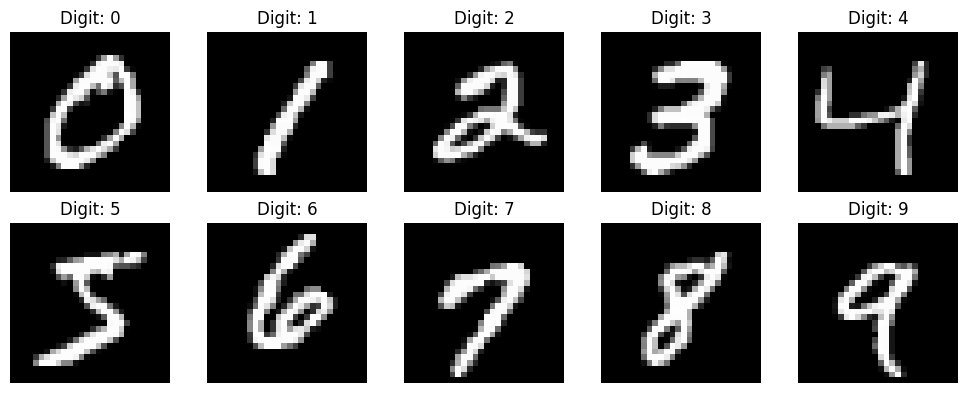

In [31]:
csv_file_path = "/content/drive/MyDrive/Classroom/Artificial_Intelligence/Week-2/mnist_dataset.csv"
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

**A Quick debugging Step:**

In [32]:
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X={len(X_train)}, y={len(y_train)}"
print("Move forward: Dimension of Feture Matrix X and label vector y matched.")

Move forward: Dimension of Feture Matrix X and label vector y matched.


**Train the Model:**

In [33]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (48000, 784)
Test data shape: (12000, 784)


Iteration 0: Cost = 2.199187
Iteration 100: Cost = 0.606743
Iteration 200: Cost = 0.489396
Iteration 300: Cost = 0.440877
Iteration 400: Cost = 0.412821
Iteration 500: Cost = 0.393960
Iteration 600: Cost = 0.380138
Iteration 700: Cost = 0.369430
Iteration 800: Cost = 0.360803
Iteration 900: Cost = 0.353652
Iteration 999: Cost = 0.347648


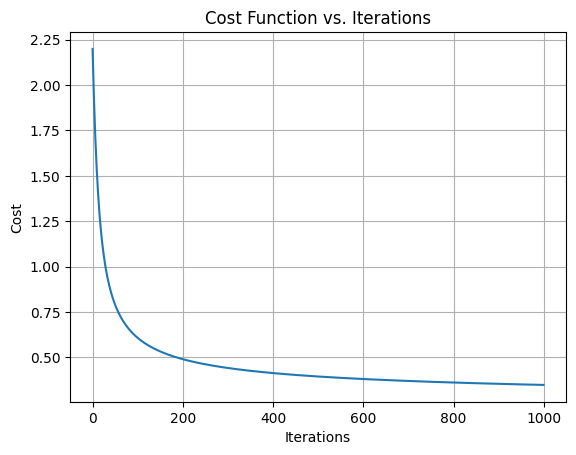

In [34]:
from sklearn.preprocessing import OneHotEncoder

if len(y_train.shape) == 1:
    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train.reshape(-1, 1))
    y_test = encoder.transform(y_test.reshape(-1, 1))

d = X_train.shape[1]
c = y_train.shape[1]

W = np.random.randn(d, c) * 0.01
b = np.zeros(c)

alpha = 0.1
n_iter = 1000

W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train, W, b, alpha, n_iter, show_cost=True)

plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

**Evaluating the Model:**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    """
    Evaluate classification performance using confusion matrix, precision, recall, and F1-score.

    Parameters:
    y_true (numpy.ndarray): True labels
    y_pred (numpy.ndarray): Predicted labels

    Returns:
    tuple: Confusion matrix, precision, recall, F1 score
    """
    cm = confusion_matrix(y_true, y_pred)

    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return cm, precision, recall, f1


Confusion Matrix:
[[1128    0    5    2    3   11    9    2   12    3]
 [   0 1274    7   11    1    5    1    4   18    1]
 [   2   15 1029   16   19    3   27   25   31    7]
 [   8    6   34 1049    1   54    9    8   29   21]
 [   1    5    7    1 1094    0   10    4    4   50]
 [  22   14   13   43   12  926   14    7   40   13]
 [   7    2   10    1   11   15 1119    2   10    0]
 [   6   26   24    3   15    3    0 1185    7   30]
 [   8   25   13   34    9   32   13    6 1005   15]
 [   7    6   10   18   43    9    0   39   10 1052]]
Precision: 0.90
Recall: 0.91
F1-Score: 0.90


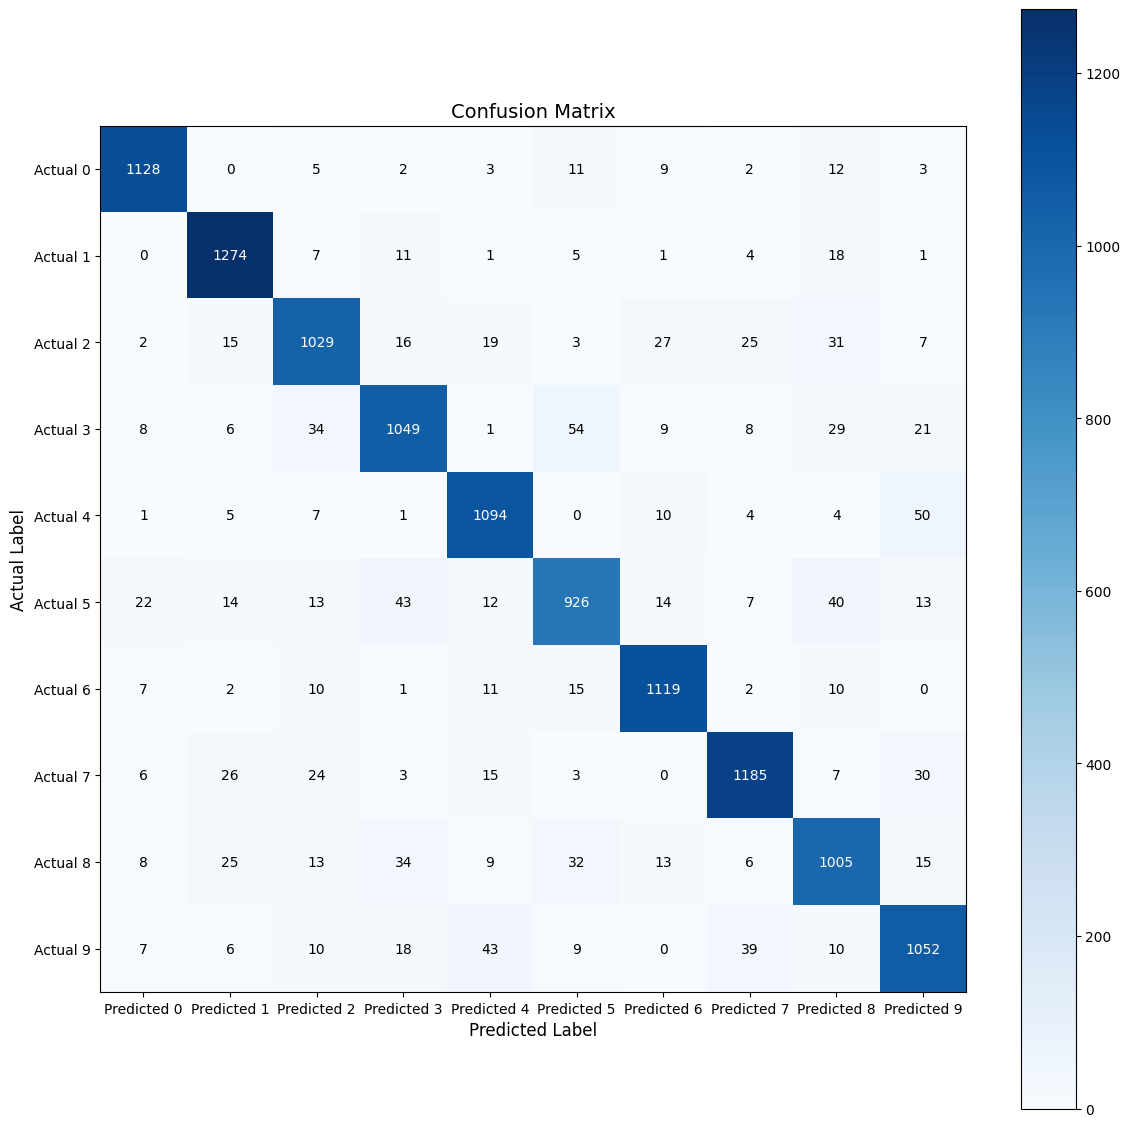

In [36]:
y_pred_test = predict_softmax(X_test, W_opt, b_opt)

y_test_labels = np.argmax(y_test, axis=1)

cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')

num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)

plt.tight_layout()
plt.colorbar(cax)
plt.show()

**Linear Seperability and Logistic Regression:**

<ipython-input-37-6a5a1fca6a1b>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='x', label='Test')


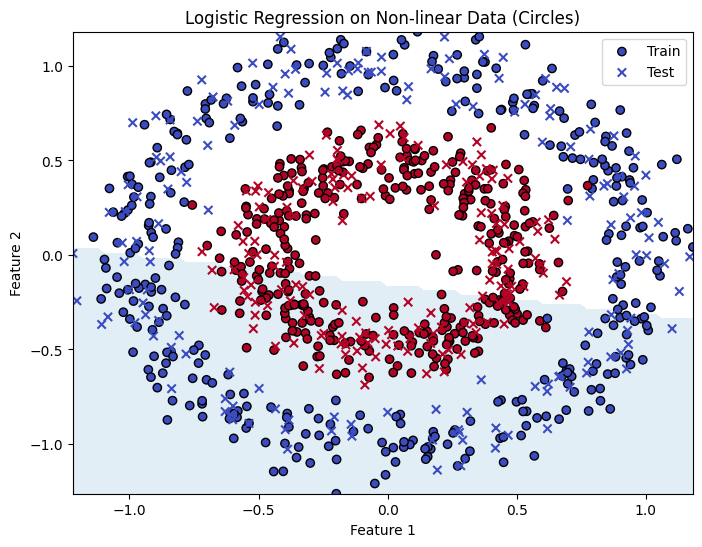

In [37]:
X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contourf(xx, yy, Z, levels=[0, 0.5], cmap='Blues', alpha=0.2)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', marker='x', label='Test')

plt.title("Logistic Regression on Non-linear Data (Circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

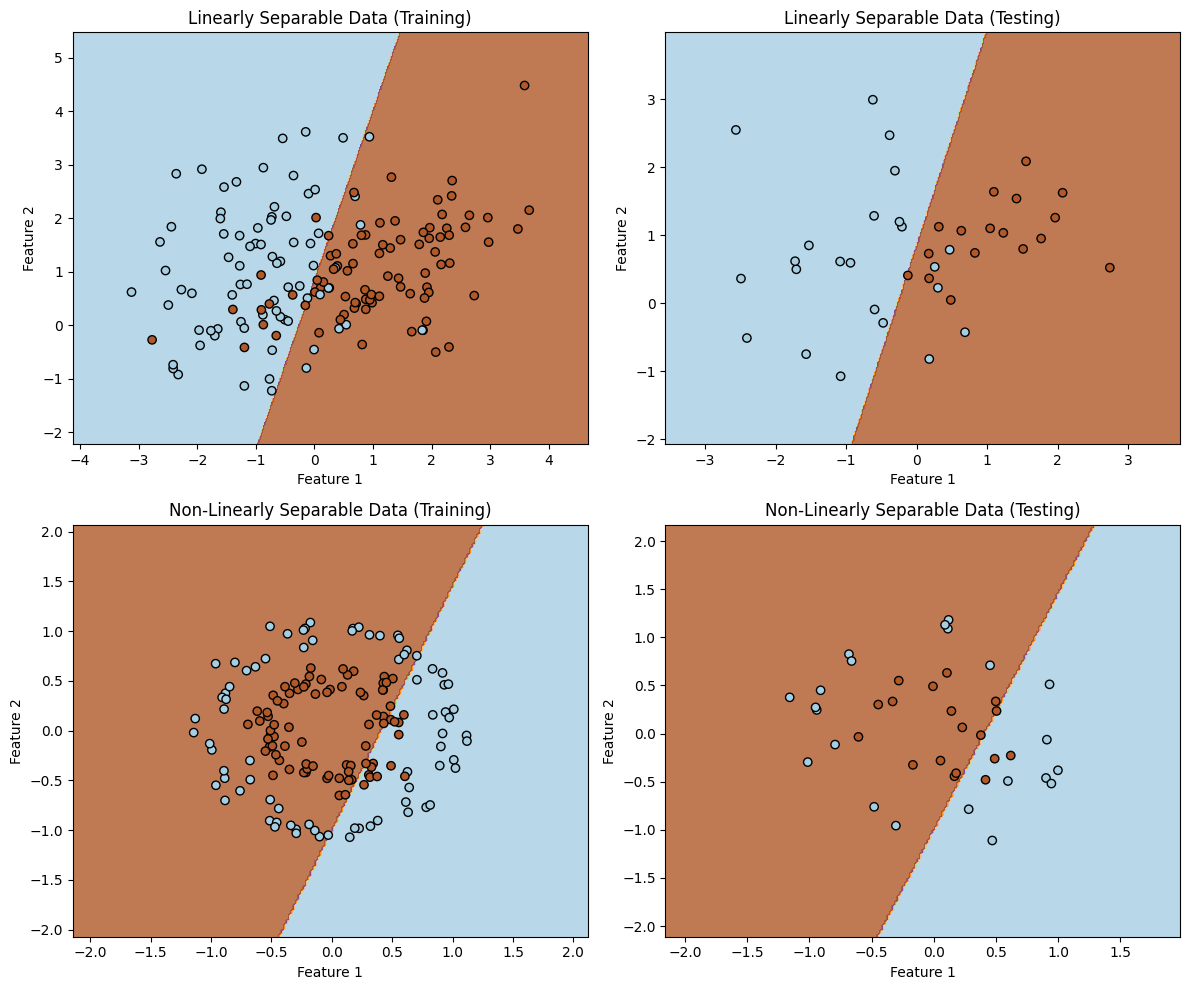

In [38]:
np.random.seed(42)

X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear_separable, y_linear_separable, test_size=0.2, random_state=42)
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42)
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)

def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_decision_boundary(axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear, "Linearly Separable Data (Training)")
plot_decision_boundary(axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear, "Linearly Separable Data (Testing)")
plot_decision_boundary(axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear, y_train_non_linear, "Non-Linearly Separable Data (Training)")
plot_decision_boundary(axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear, y_test_non_linear, "Non-Linearly Separable Data (Testing)")

plt.tight_layout()
plt.show()